# Integration of D30 TSC and EXMC, naive and primed cells with human embryo datasets (Messmer, Petropoulos, Zhou and Tyser)

In [1]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

## Libraries

In [2]:
library(Seurat)
library(dplyr)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [4]:
library(patchwork)

In [5]:
library(viridis)

Loading required package: viridisLite



In [6]:
library(ggplot2)

In [7]:
library(RColorBrewer)

In [8]:
library("xlsx")

In [9]:
library("stringr")

## Colour blind palette

In [10]:
#n <- 60
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [11]:
col_vector

[1] "#7FC97F" "#BEAED4" "#FDC086" "#FFFF99" "#386CB0" "#F0027F" "#BF5B17"
 [8] "#666666" "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02"
[15] "#A6761D" "#666666" "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99"
[22] "#E31A1C" "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"
[29] "#FBB4AE" "#B3CDE3" "#CCEBC5" "#DECBE4" "#FED9A6" "#FFFFCC" "#E5D8BD"
[36] "#FDDAEC" "#F2F2F2" "#B3E2CD" "#FDCDAC" "#CBD5E8" "#F4CAE4" "#E6F5C9"
[43] "#FFF2AE" "#F1E2CC" "#CCCCCC" "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3"
[50] "#FF7F00" "#FFFF33" "#A65628" "#F781BF" "#999999" "#66C2A5" "#FC8D62"
[57] "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494" "#B3B3B3" "#8DD3C7"
[64] "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69" "#FCCDE5"
[71] "#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F"

In [12]:
color_2 = grDevices::colors()[grep('gr(a|e)y', grDevices::colors())]

## Loading count matrix and annotation

In [70]:
tyser_VP_MPZ_count_mtx<- read.csv("/lustre1/project/stg_00041/XuanAi/2020_2021/Tyser_gastrulation/tyser_VP_MPZ_count_mtx.csv",row.names =1)

In [66]:
tyser_VP_MPZ_annotation<- read.csv( "/lustre1/project/stg_00041/XuanAi/2020_2021/Tyser_gastrulation/tyser_VP_MPZ_annotation.csv",row.names =1)

## Create Seurat object

In [106]:
tyser_VP_MPZ_Seu <- CreateSeuratObject(
  counts = tyser_VP_MPZ_count_mtx,
  project = "Tyser_VP_Messmer_Petropoulos_Zhou", 
  min.cells = 0,
  min.features = 0,
  names.field = 2,
  names.delim = "_")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"Warning message in CreateSeuratObject(counts = tyser_VP_MPZ_count_mtx, project = "Tyser_VP_Messmer_Petropoulos_Zhou", :
"Input parameters result in NA values for initial cell identities. Setting all initial idents to the project name"

In [107]:
tyser_VP_MPZ_Seu

An object of class Seurat 
80133 features across 10388 samples within 1 assay 
Active assay: RNA (80133 features)

## Create Seurat object with integrating

In [118]:
tyser_VP_MPZ_Seu.list <- SplitObject(tyser_VP_MPZ_Seu,  split.by = "Experiment")

In [119]:
#tyser_VP_MPZ_Seu.list <- tyser_VP_MPZ_Seu.list[c( "Pet", "Messmer", "Zhou","VP")]

In [120]:
tyser_VP_MPZ_Seu.list 
length(tyser_VP_MPZ_Seu.list)

$Zhou
An object of class Seurat 
80133 features across 5895 samples within 1 assay 
Active assay: RNA (80133 features)

$Messmer
An object of class Seurat 
80133 features across 905 samples within 1 assay 
Active assay: RNA (80133 features)

$Pet
An object of class Seurat 
80133 features across 1526 samples within 1 assay 
Active assay: RNA (80133 features)

$VP
An object of class Seurat 
80133 features across 867 samples within 1 assay 
Active assay: RNA (80133 features)

$Tyser
An object of class Seurat 
80133 features across 1195 samples within 1 assay 
Active assay: RNA (80133 features)


[1] 5

In [121]:
tyser_VP_MPZ_Seu.list[5]

$Tyser
An object of class Seurat 
80133 features across 1195 samples within 1 assay 
Active assay: RNA (80133 features)


In [122]:
for (i in (1: 4)){
tyser_VP_MPZ_Seu.list[[i]]<- NormalizeData(tyser_VP_MPZ_Seu.list[[i]], verbose =FALSE)
}
tyser_VP_MPZ_Seu.list[[5]]<- tyser_VP_MPZ_Seu.list[[5]]

In [123]:
tyser_VP_MPZ_Seu.list[[5]]

An object of class Seurat 
80133 features across 1195 samples within 1 assay 
Active assay: RNA (80133 features)

In [124]:
for (i in (1: length(tyser_VP_MPZ_Seu.list))){
tyser_VP_MPZ_Seu.list[[i]]<- FindVariableFeatures(tyser_VP_MPZ_Seu.list[[i]], selection.method = "vst", nfeatures = 5000,verbose = FALSE)
}

In [125]:
# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = tyser_VP_MPZ_Seu.list)

In [126]:
tyser_VP_MPZ_Seu.anchors <- FindIntegrationAnchors(object.list = tyser_VP_MPZ_Seu.list, anchor.features = features)

Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4320 anchors
Filtering anchors
	Retained 1891 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5219 anchors
Filtering anchors
	Retained 2627 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3488 anchors
Filtering anchors
	Retained 1272 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4085 anchors
Filtering anchors
	Retained 1903 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2912 anchors
Filtering anchors
	Retained 1345 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3433 anchors
Filtering anchors
	Retained 1180

In [127]:
tyser_VP_MPZ_Seu.anchors

An AnchorSet object containing 32426 anchors between 5 Seurat objects 
 This can be used as input to IntegrateData or TransferData.

In [128]:
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- IntegrateData(anchorset = tyser_VP_MPZ_Seu.anchors, dims = 1:50)

Merging dataset 4 into 1
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 5 into 1 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 2 into 3
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 3 2 into 1 4 5
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data


In [129]:
DefaultAssay(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration) <- "integrated"

In [130]:
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration

An object of class Seurat 
82133 features across 10388 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA

In [131]:
# Run the standard workflow for visualization and clustering
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- ScaleData(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, verbose = FALSE)
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- RunPCA(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, npcs = 30, verbose = FALSE)
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- RunUMAP(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "pca", dims = 1:30)
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- FindNeighbors(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "pca", dims = 1:30)


03:30:34 Read 10388 rows and found 30 numeric columns
03:30:34 Using Annoy for neighbor search, n_neighbors = 30
03:30:34 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
03:30:37 Writing NN index file to temp file /tmp/Rtmpxns7B1/file34725cd53d6b
03:30:37 Searching Annoy index using 1 thread, search_k = 3000
03:30:51 Annoy recall = 100%
03:30:51 Commencing smooth kNN distance calibration using 1 thread
03:30:53 Initializing from normalized Laplacian + noise
03:30:54 Commencing optimization for 200 epochs, with 455276 positive edges
03:31:07 Optimization finished
Computing nearest neighbor graph
Computing SNN


In [132]:
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration <- FindClusters(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10388
Number of edges: 375120

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9032
Number of communities: 16
Elapsed time: 1 seconds


In [64]:
saveRDS(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration,file= "/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed/Messmer_Petropoulos_Zhou_Tyser_VPD30_integration.rds")

In [14]:
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration

An object of class Seurat 
81927 features across 10150 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [21]:
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters[which(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters=="undefined_VP")]<- "Pham, Panda EXMC" 
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters[which(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters=="primed_1")]<- "Pham, Panda primed" 
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters[which(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters=="TSC_VP")]<- "Pham, Panda TSC" 
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters[which(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters=="naive_VP")]<- "Pham, Panda Naive" 


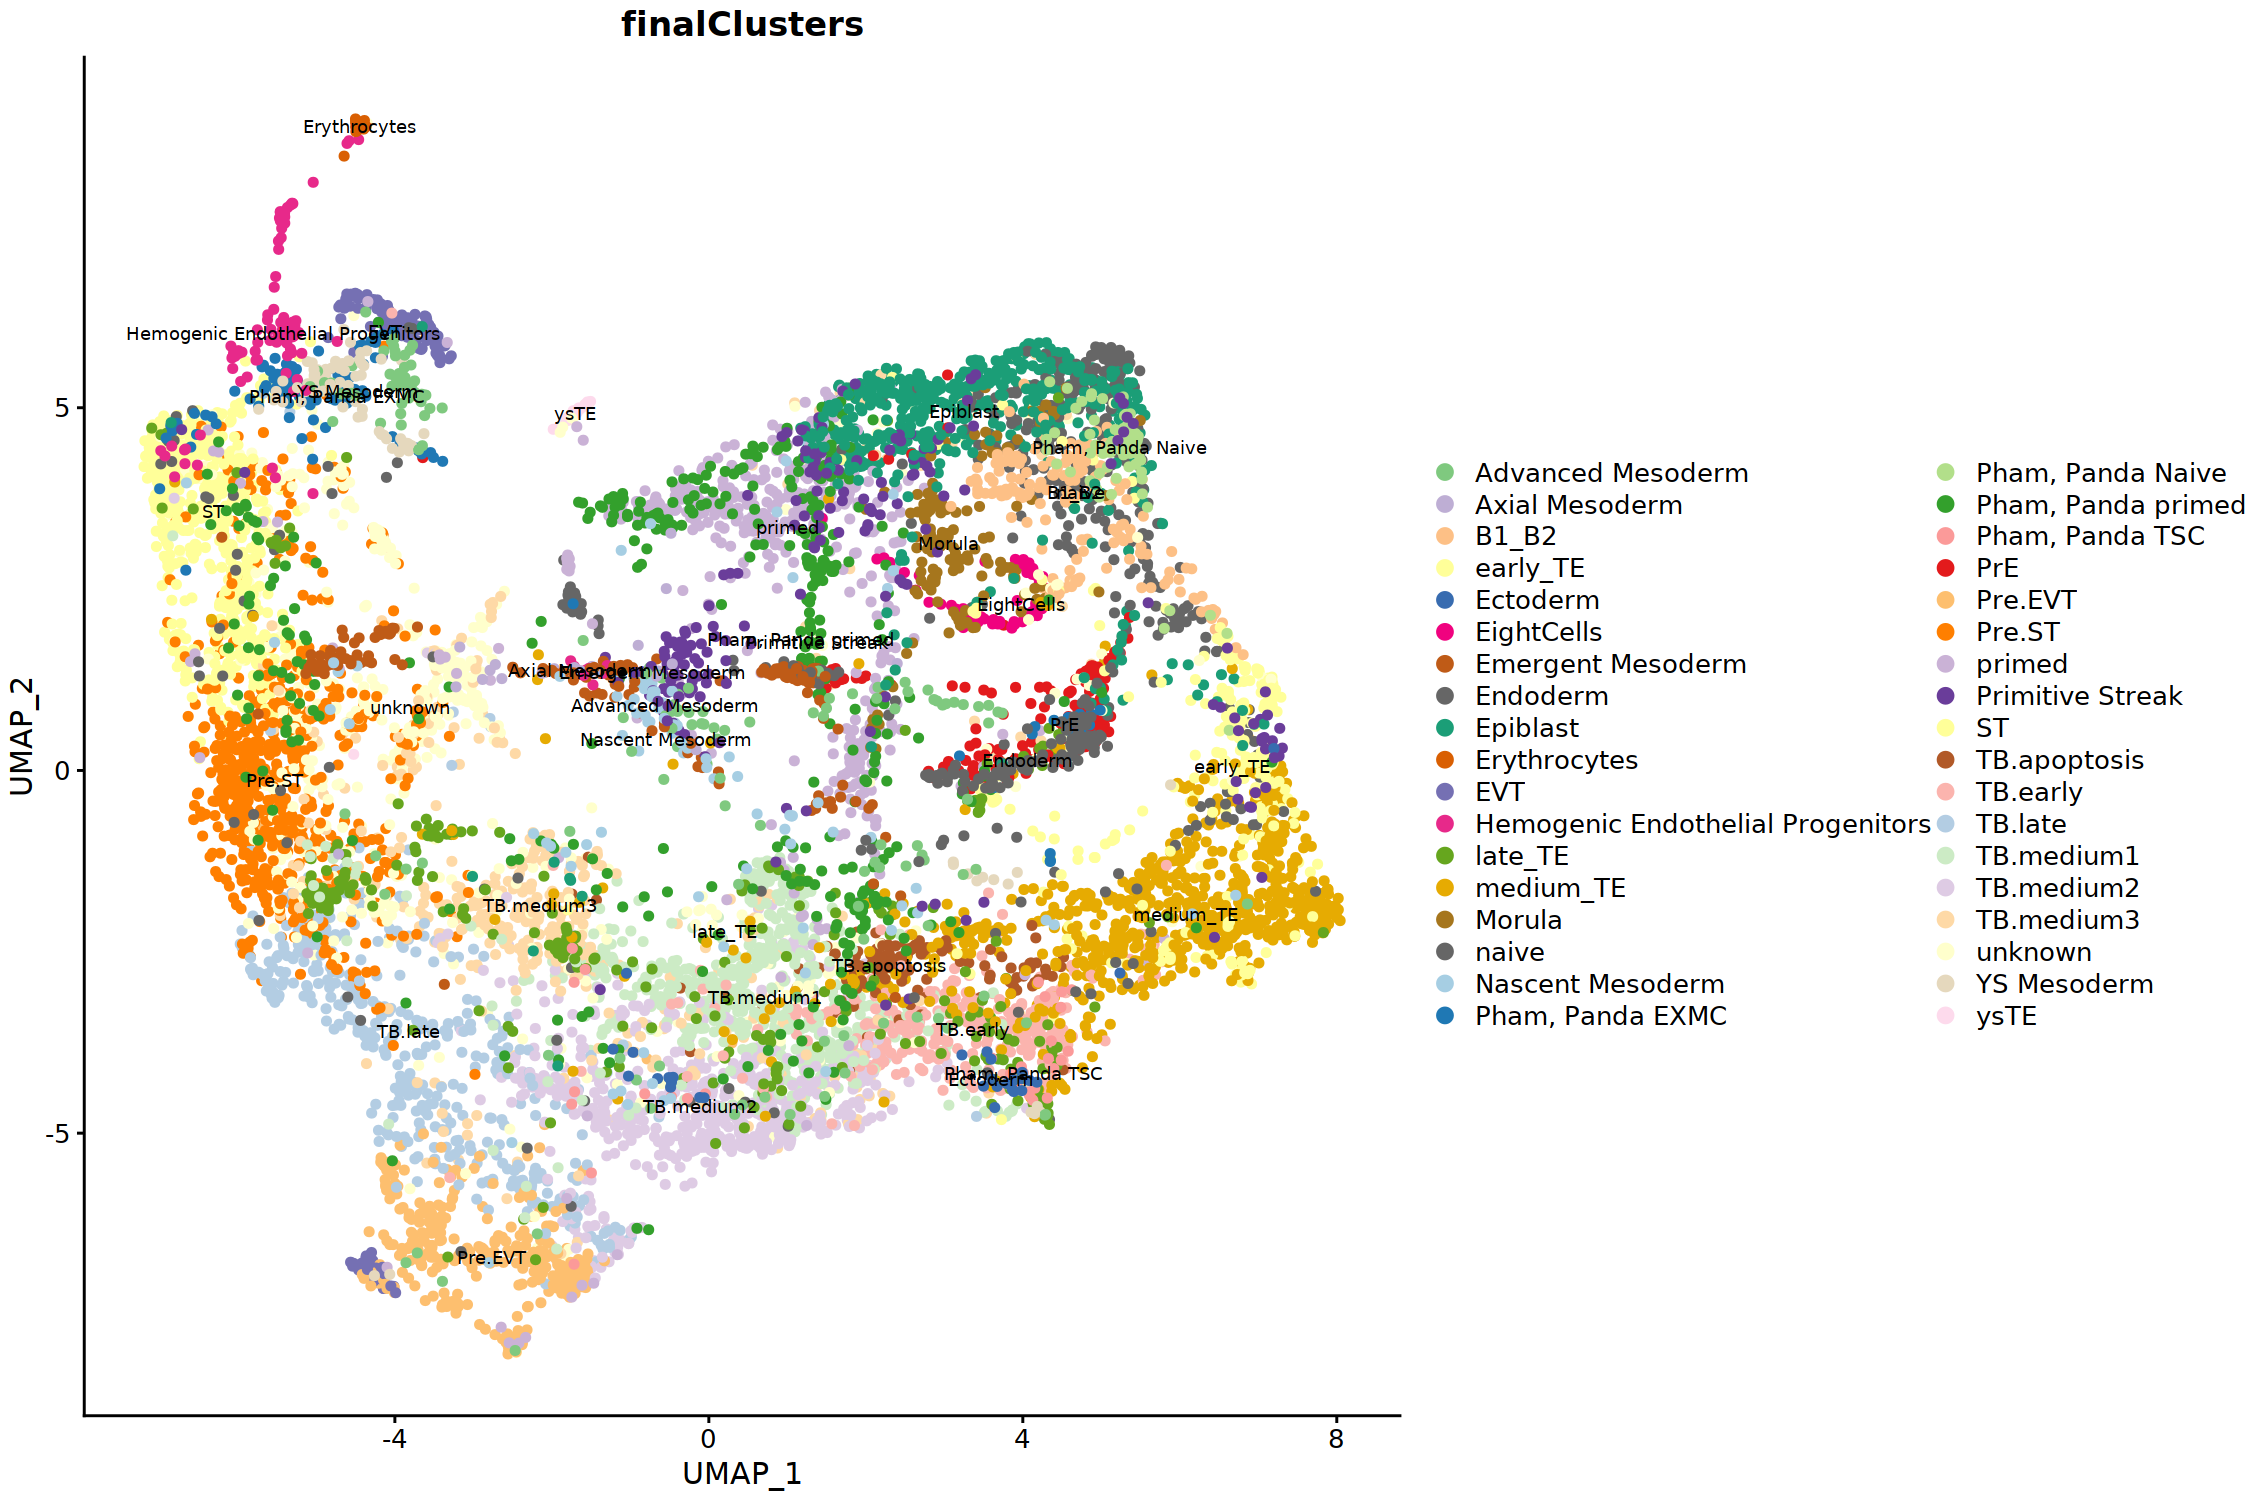

In [22]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
umap_1<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap", pt.size =1.5, label.size = 3, label=T, cols = col_vector, group.by = "finalClusters")
umap_1

In [23]:
pdf("Figures/Fig1F_UMAP_integrated_MPZT_VPD30", width = 15, height = 10)
plot(umap_1)
dev.off()

png 
  2

In [26]:
Idents(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration) <- "finalClusters"

In [39]:
ExMesoderm <- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("YS Mesoderm"))
EXMC<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Pham, Panda EXMC"))
naive_VP<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Pham, Panda Naive"))
primed_messmer<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("primed"))
primed_1_VP <- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Pham, Panda primed"))
naive_messmer<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("naive"))
TSC_VP<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Pham, Panda TSC"))
TB.late<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("TB.late"))
TB.medium2<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("TB.medium2"))
TB.medium1<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("TB.medium1"))
TB.medium3 <- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("TB.medium3"))
TB.early<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("TB.early"))
PrE<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("PrE"))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



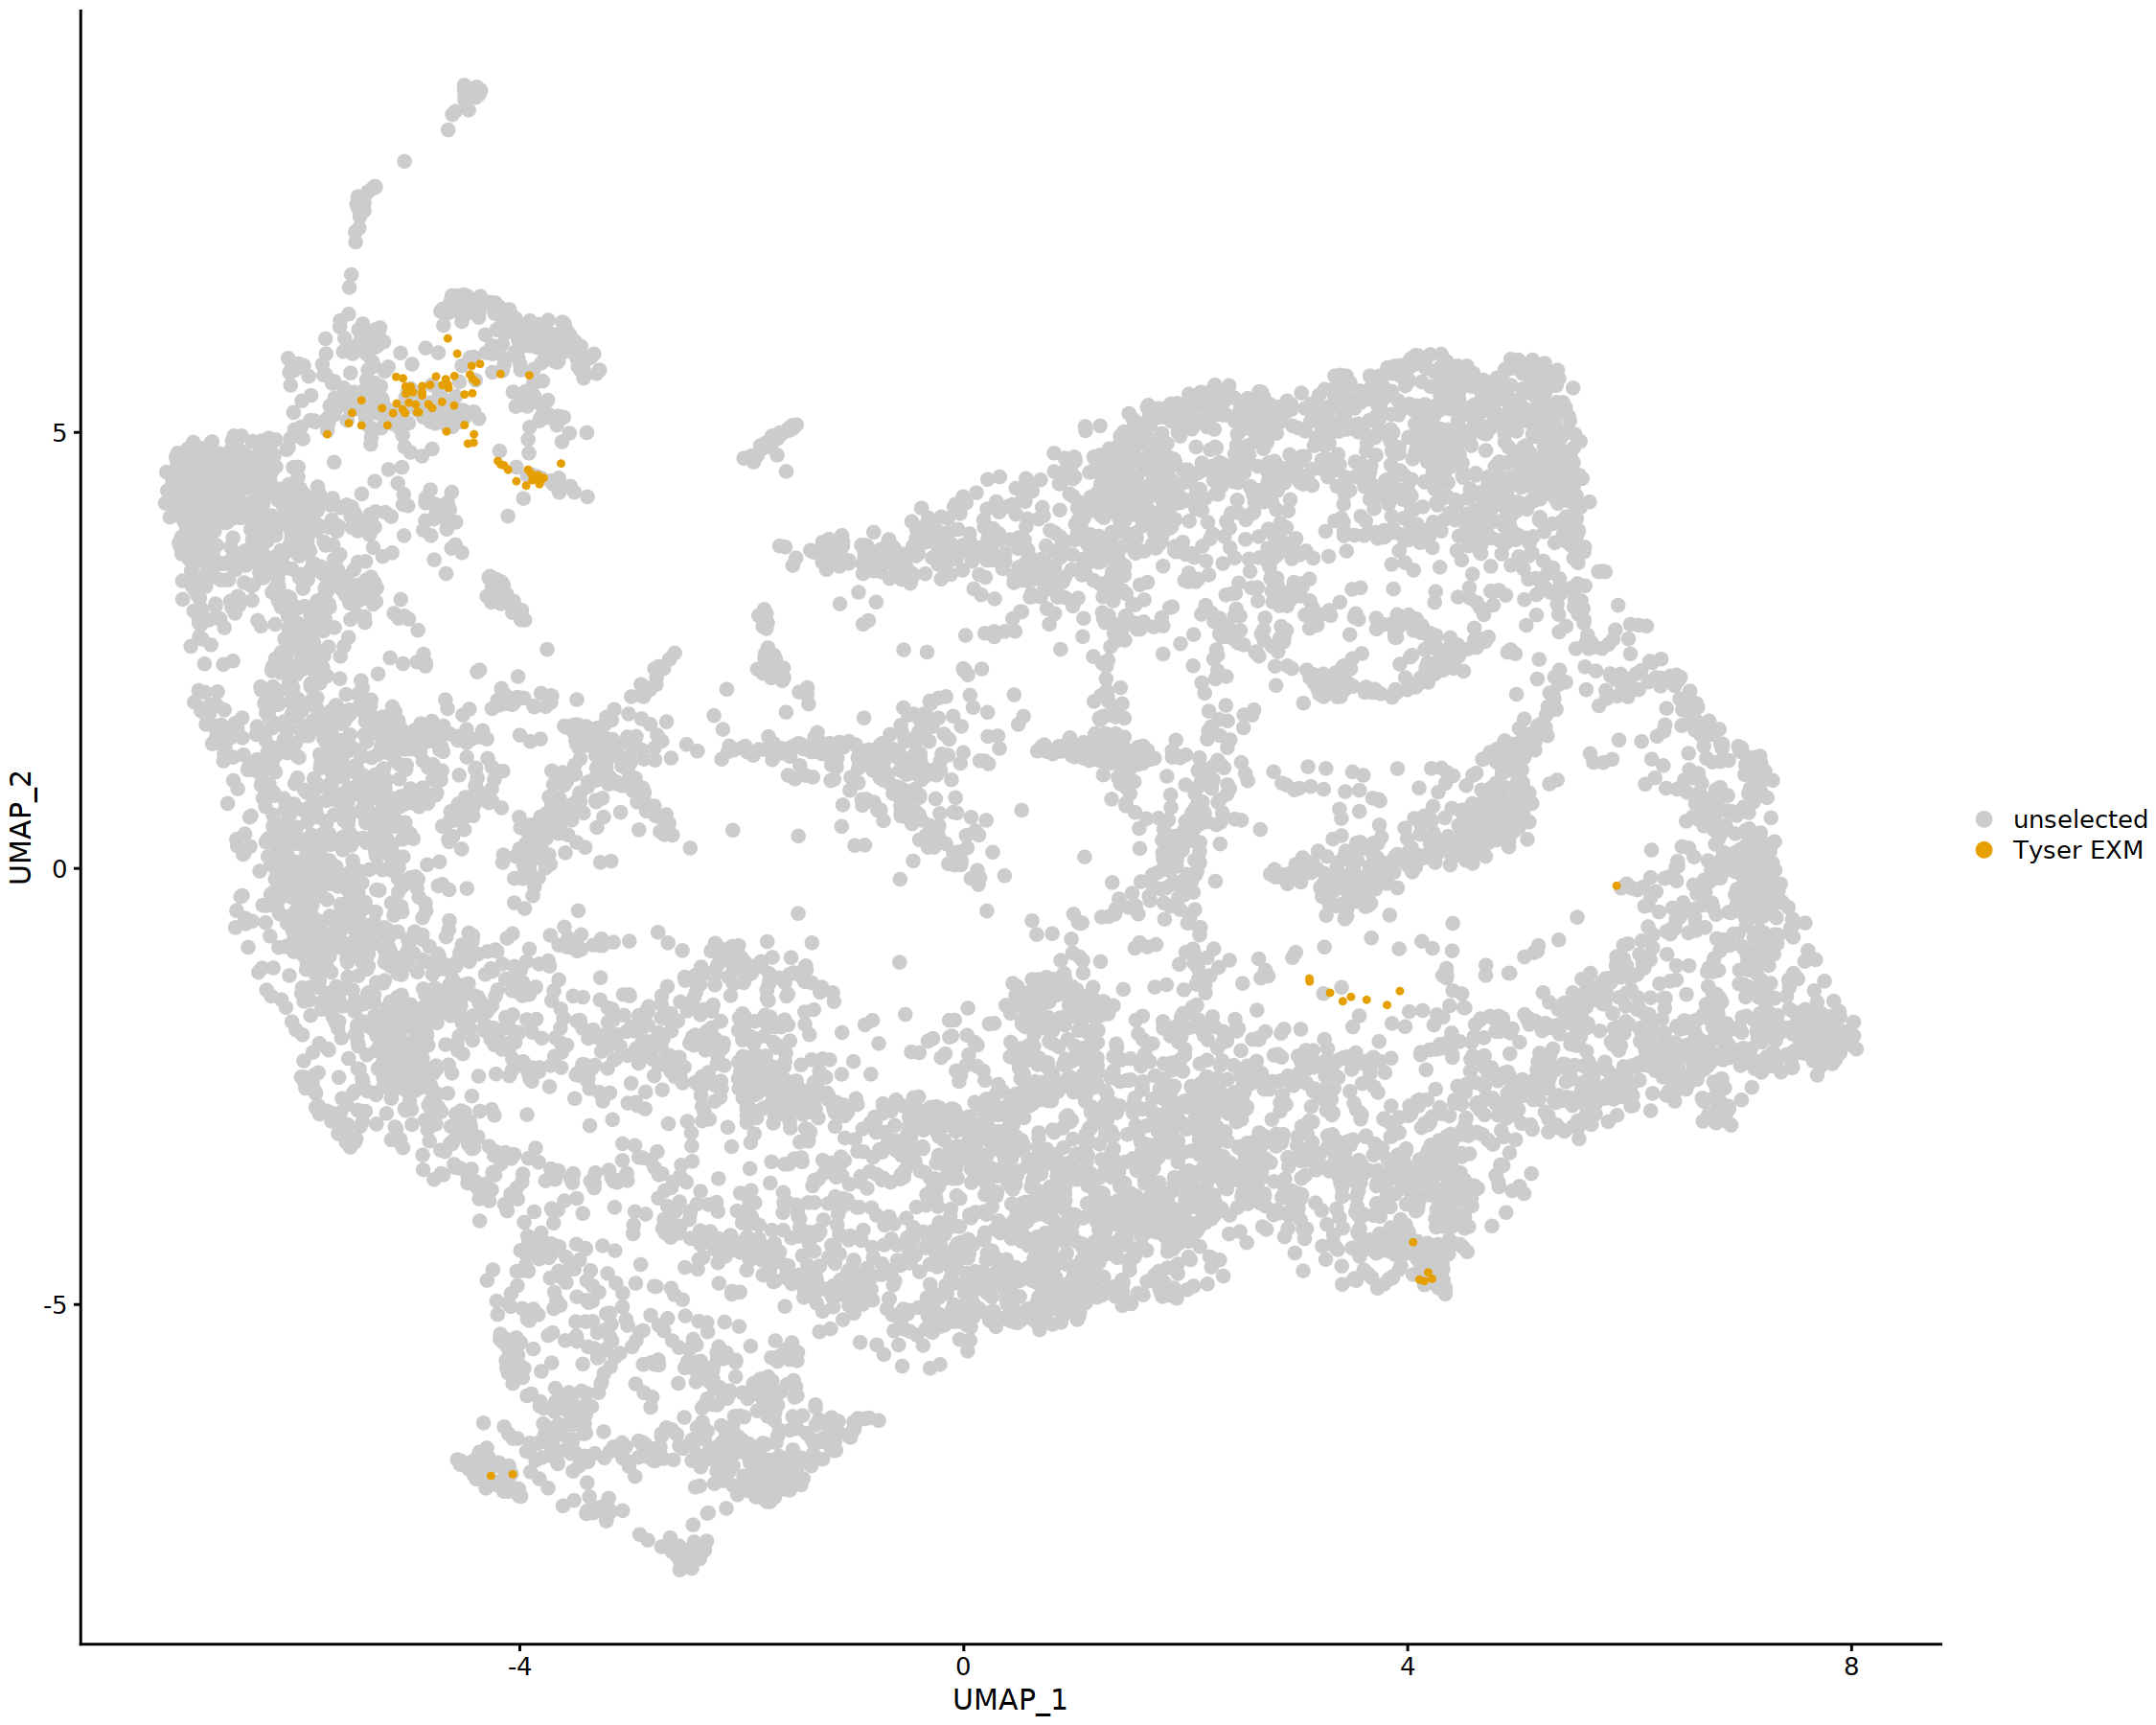

In [34]:
options(repr.plot.width=15, repr.plot.height=12)
p<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(ExMesoderm), cols.highlight = c("#E69F00") , pt.size =2.5, label.size = 3, cols= "grey") + 
  scale_color_manual(labels = c("unselected","Tyser EXM"), values = c("grey80","#E69F00")) 
p

In [35]:
pdf("Figures/Fig1G_UMAP_integrated_MPVZT_VPD30_TyserEXM.pdf", width = 15, height = 12)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



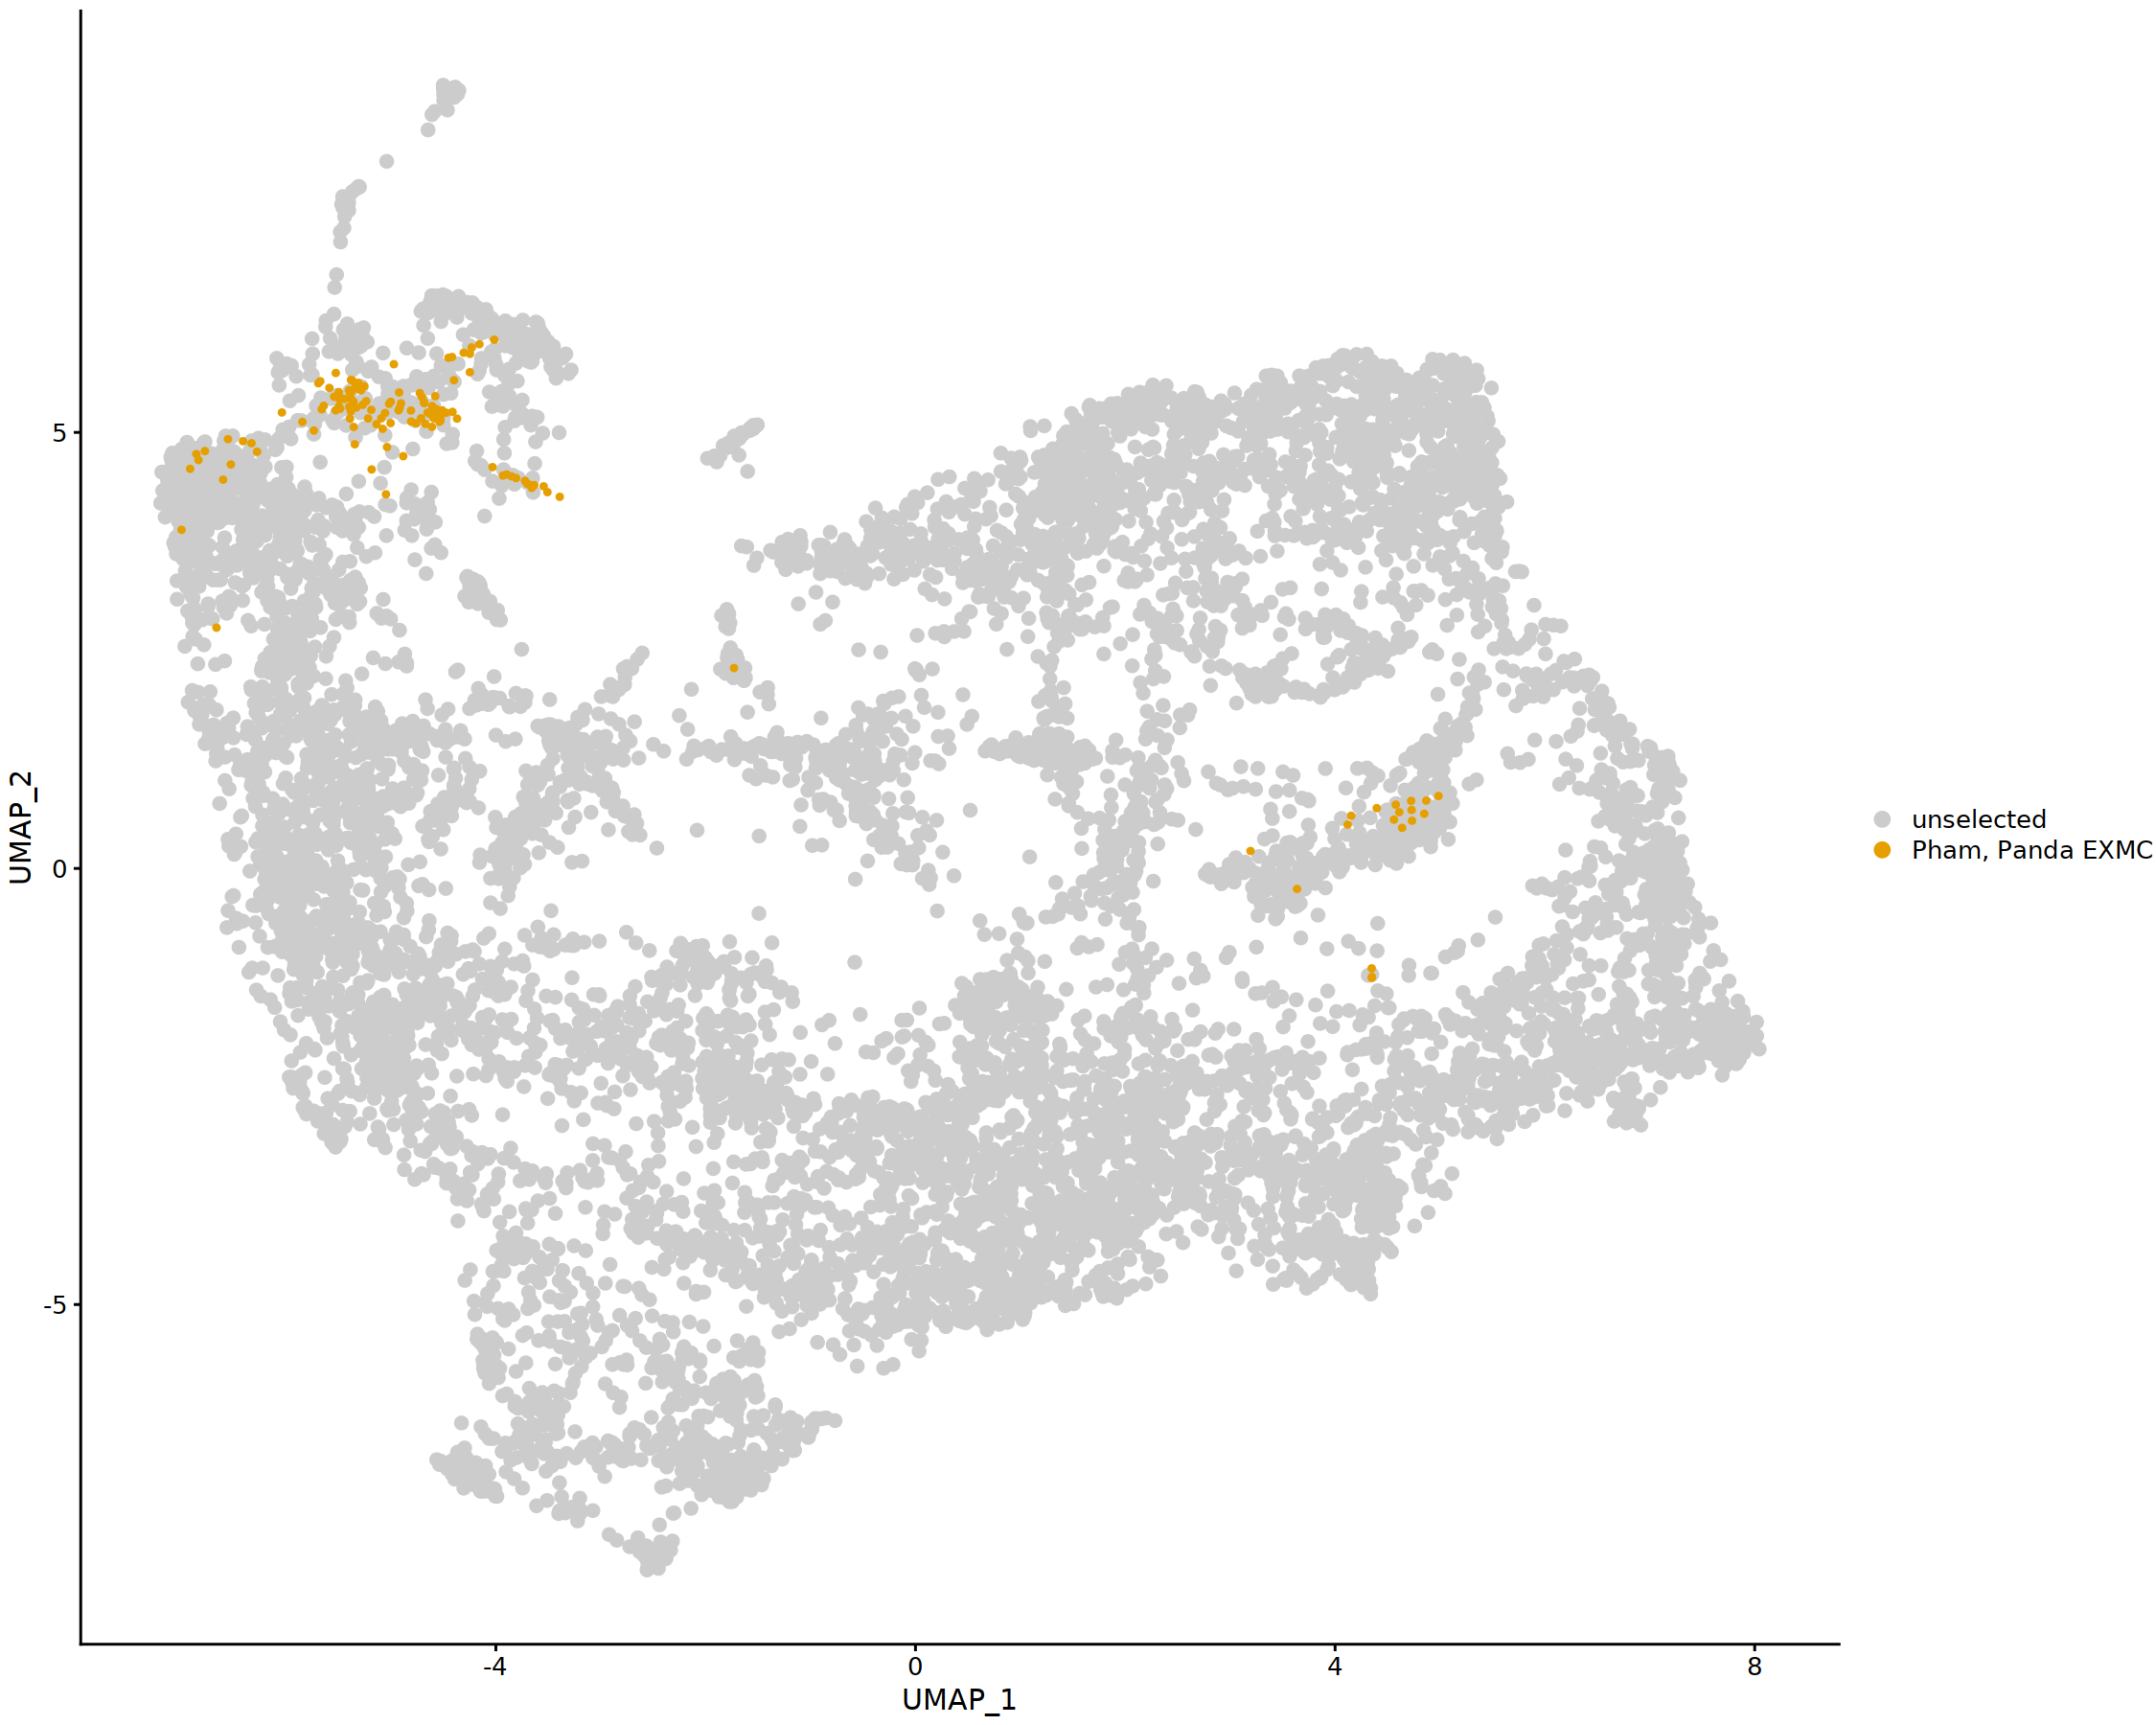

In [37]:
options(repr.plot.width=15, repr.plot.height=12)
p<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(EXMC), cols.highlight = c("#E69F00") , pt.size =2.5, label.size = 3, cols= "grey") + 
  scale_color_manual(labels = c("unselected","Pham, Panda EXMC"), values = c("grey80","#E69F00")) 
p

In [38]:
pdf("Figures/Fig1G_UMAP_integrated_MPVZT_VPD30_EXMC.pdf", width = 15, height = 12)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



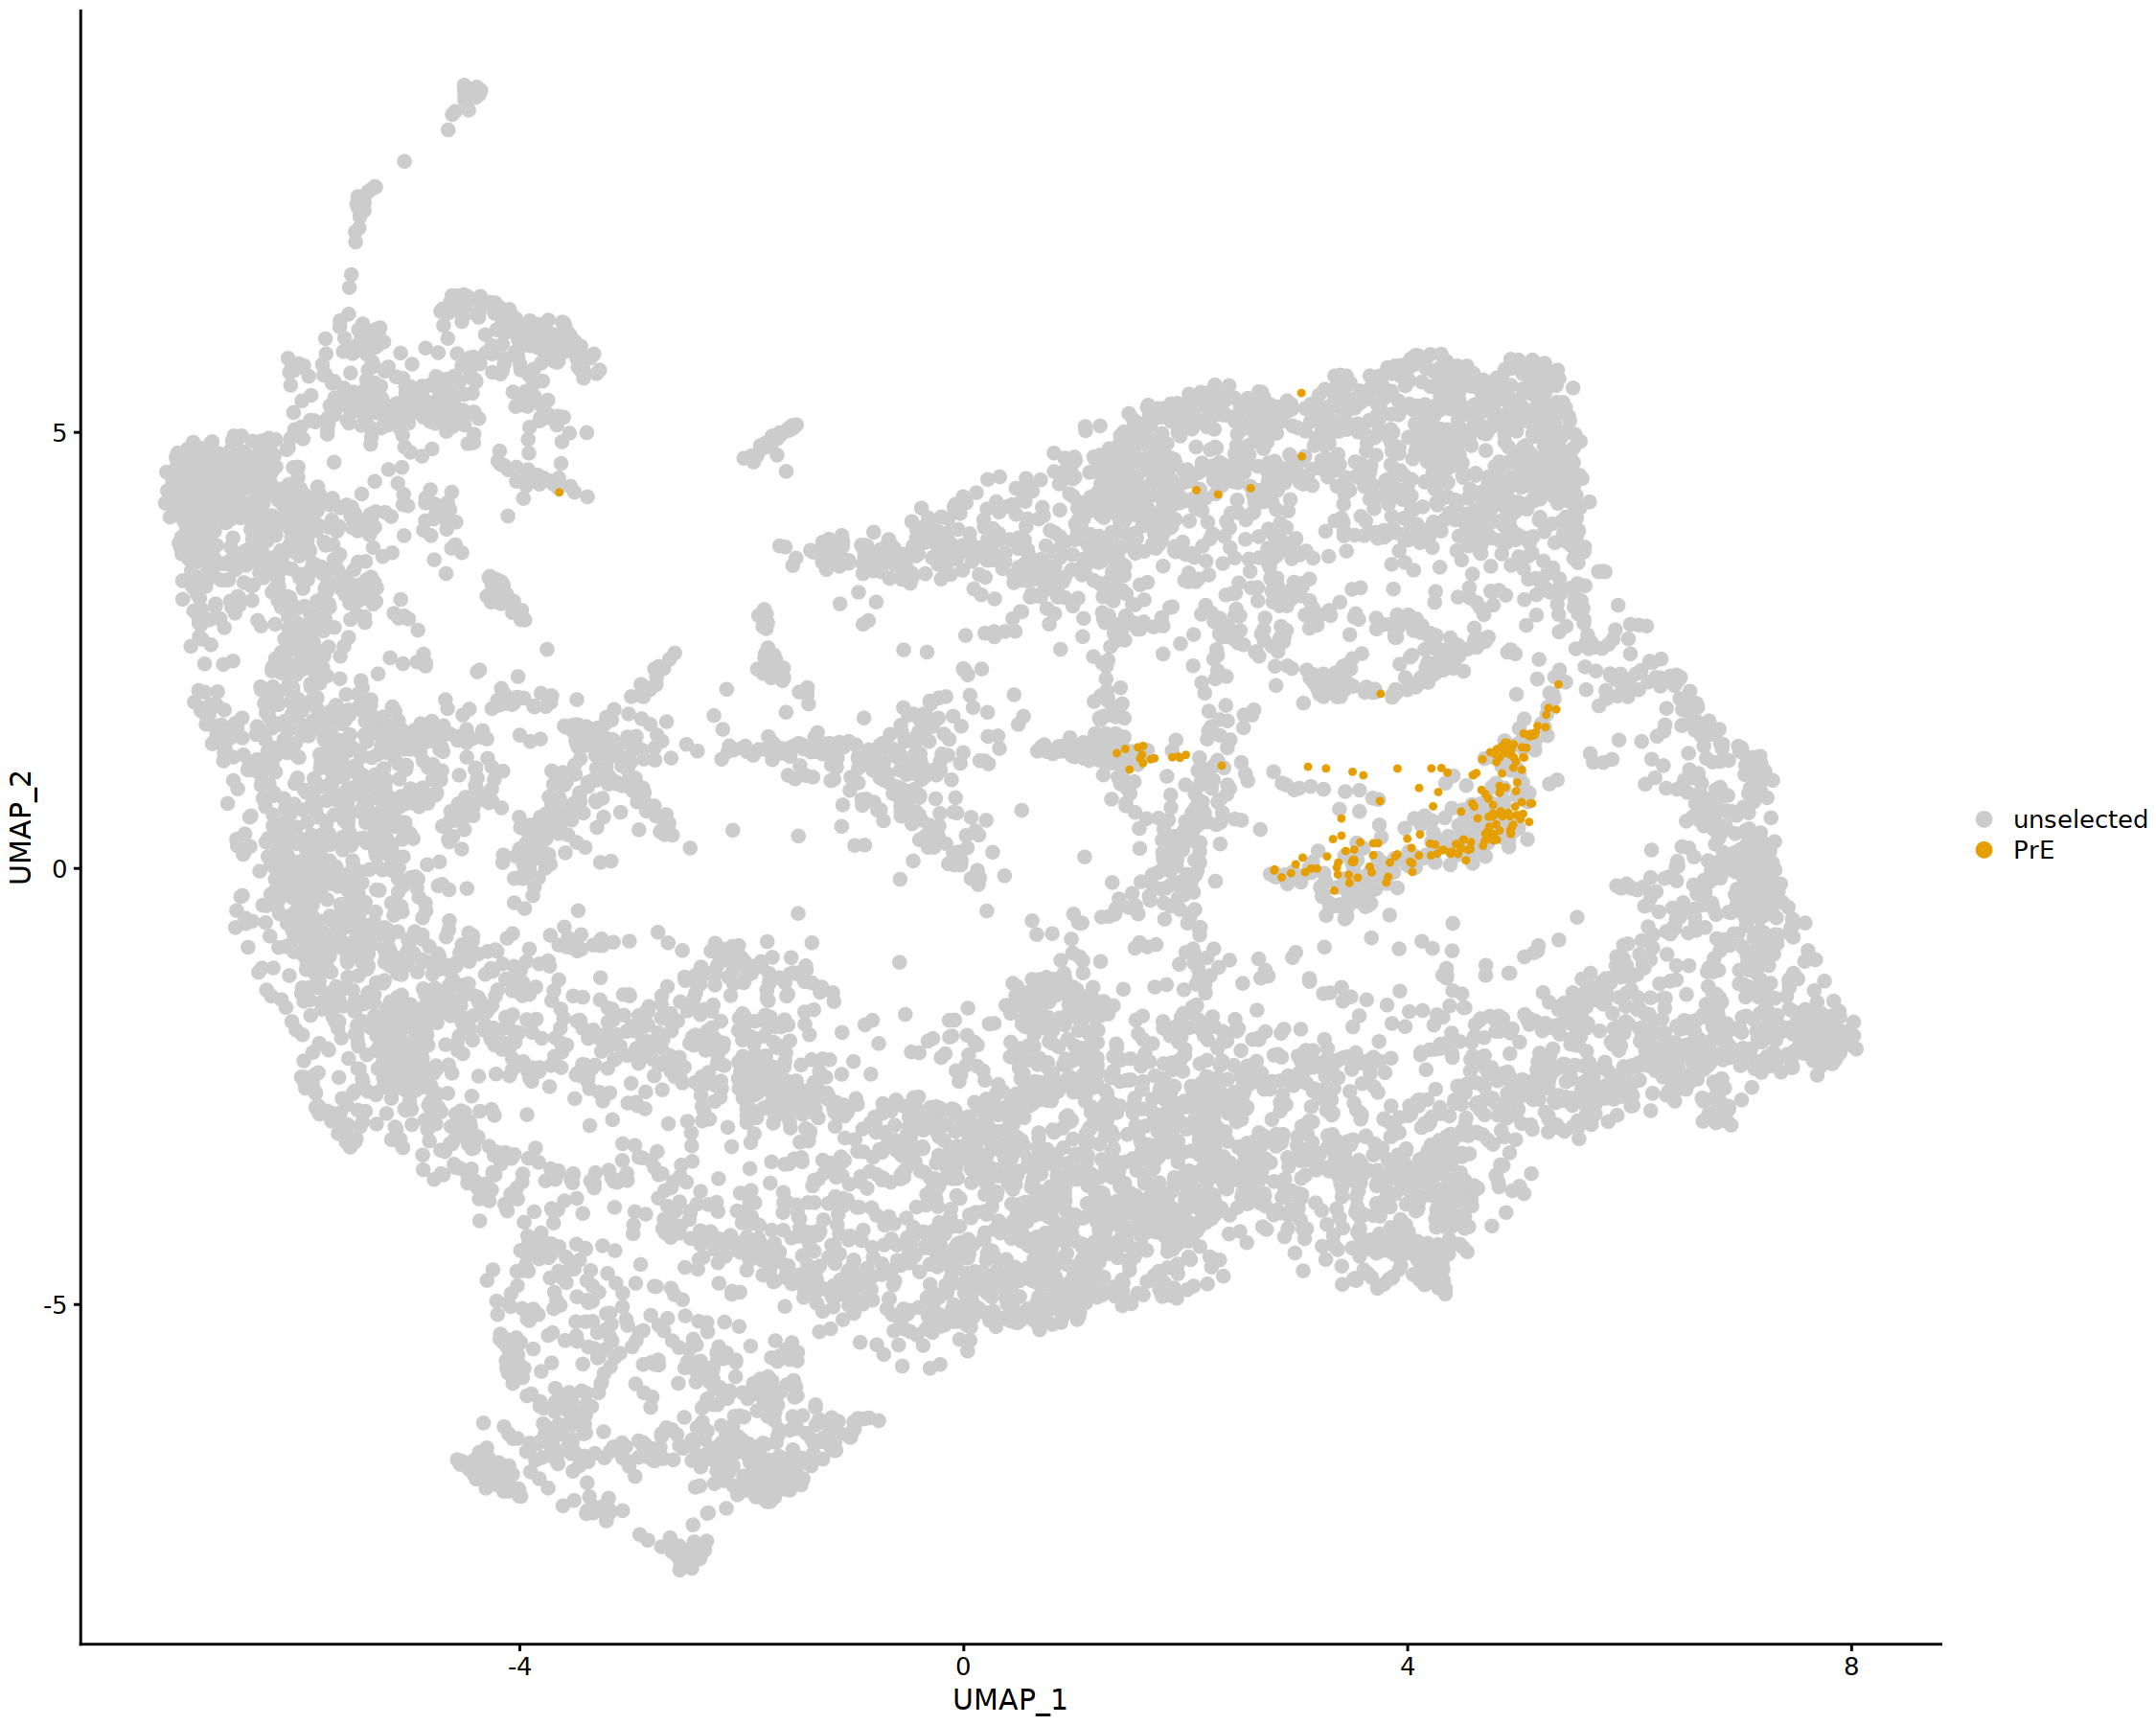

In [40]:
options(repr.plot.width=15, repr.plot.height=12)
p<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(PrE), cols.highlight = c("#E69F00") , pt.size =2.5, label.size = 3, cols= "grey") + 
  scale_color_manual(labels = c("unselected","PrE"), values = c("grey80","#E69F00")) 
p

In [41]:
pdf("Figures/Fig1G_UMAP_integrated_MPVZT_VPD30_PrE.pdf", width = 15, height = 12)
plot(p)
dev.off()

png 
  2

In [42]:
Idents(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration) <- "Experiment"

In [43]:
VP <- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("VP"))
Pet<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Pet"))
Zhou<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Zhou"))
Tyser<- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Tyser"))
Messmer <- WhichCells(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, idents = c("Messmer"))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



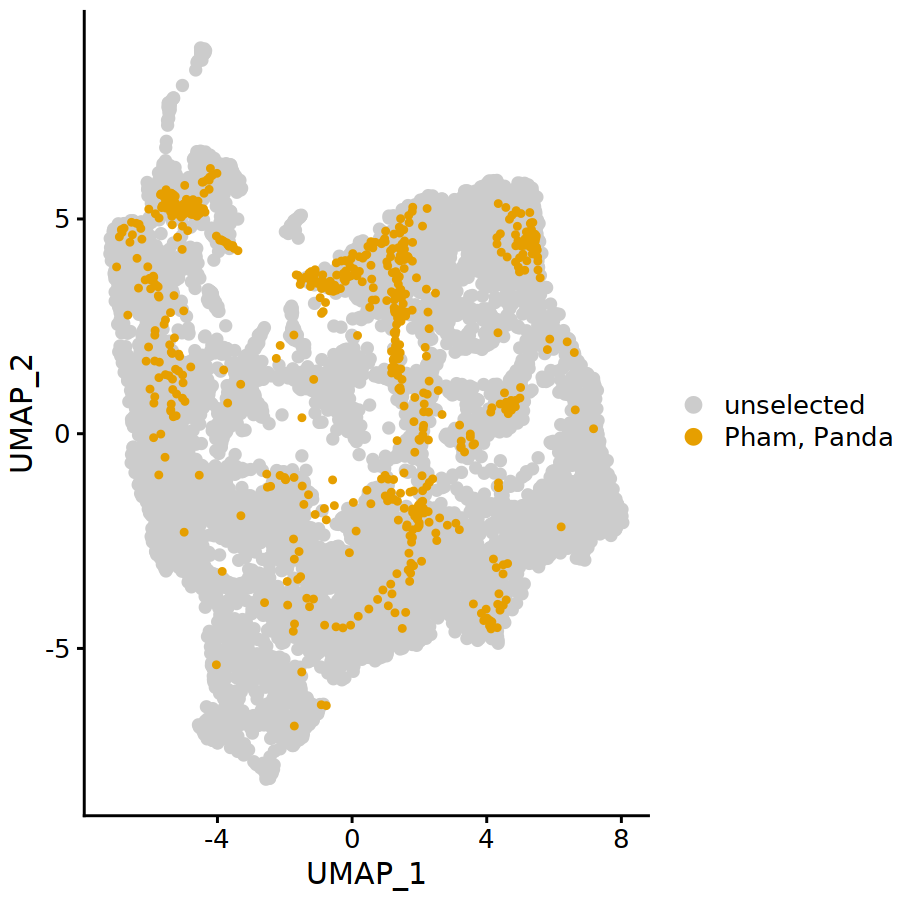

In [44]:
options(repr.plot.width=6, repr.plot.height=6)
umap_VP<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(VP ), cols.highlight = c("#E69F00") , pt.size =2, label.size = 3, cols= "grey")+ 
  scale_color_manual(labels = c("unselected","Pham, Panda"), values = c("grey80","#E69F00")) 
umap_VP

In [45]:
pdf("Figures/FigS1B_UMAP_integrated_MPVZT_PhamPanda.pdf", width = 6, height = 6)
plot(umap_VP)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



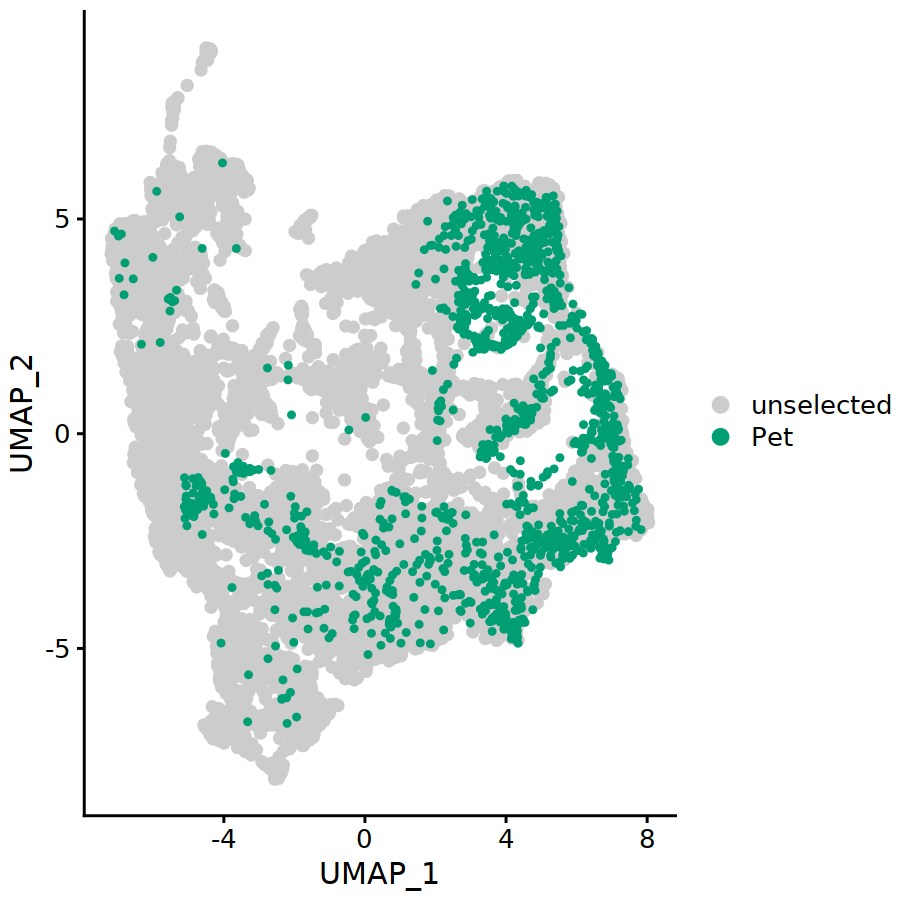

In [47]:
options(repr.plot.width=6, repr.plot.height=6)
umap_Pet<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(Pet), cols.highlight = c("#009E73") , pt.size =2, label.size = 3, cols= "grey") + 
  scale_color_manual(labels = c("unselected","Pet"), values = c("grey80","#009E73")) 
umap_Pet

In [49]:
pdf("Figures/FigS1B_UMAP_integrated_MPVZT_Pet.pdf", width = 6, height = 6)
plot(umap_Pet)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



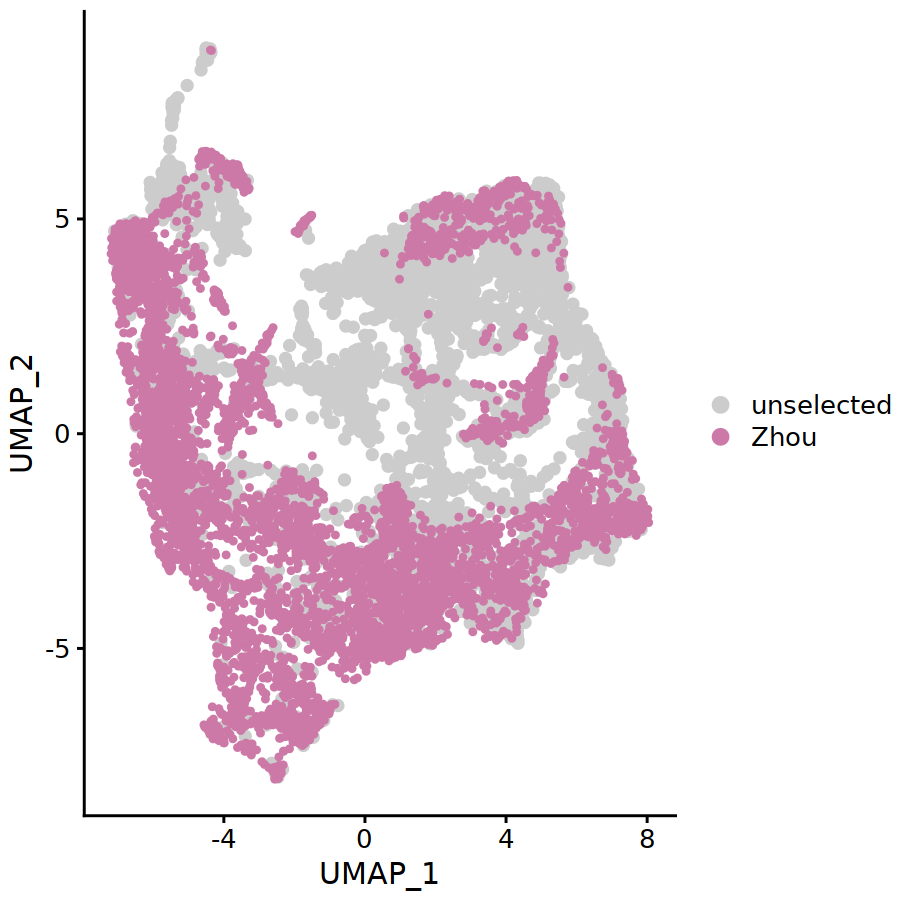

In [59]:
options(repr.plot.width=6, repr.plot.height=6)
umap_Zhou<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(Zhou), cols.highlight = c("#CC79A7") , pt.size =2, label.size = 3, cols= "grey")+ 
  scale_color_manual(labels = c("unselected","Zhou"), values = c("grey80","#CC79A7")) 
umap_Zhou

In [60]:
pdf("Figures/FigS1B_UMAP_integrated_MPVZT_Zhou.pdf", width = 6, height = 6)
plot(umap_Pet)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



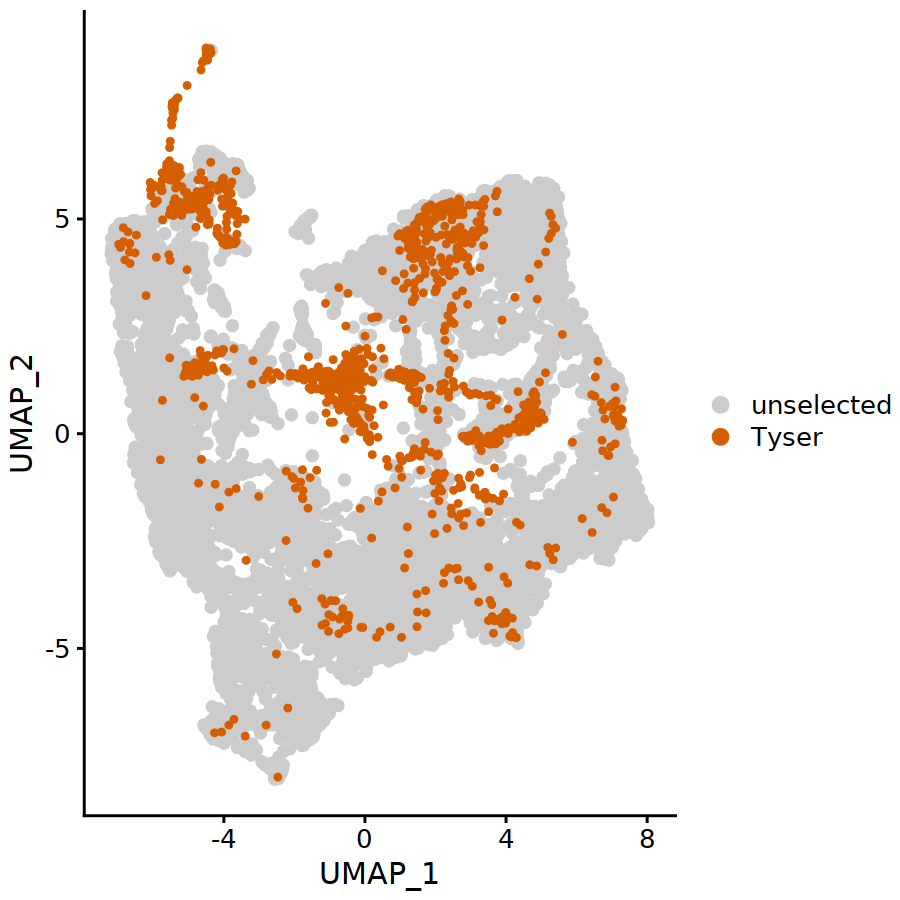

In [57]:
options(repr.plot.width=6, repr.plot.height=6)
umap_Tyser<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(Tyser), cols.highlight = c("#D55E00") , pt.size =2, label.size = 3, cols= "grey")+ 
  scale_color_manual(labels = c("unselected","Tyser"), values = c("grey80","#D55E00")) 
umap_Tyser

In [58]:
pdf("Figures/FigS1B_UMAP_integrated_MPVZT_Tyser.pdf", width = 6, height = 6)
plot(umap_Pet)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



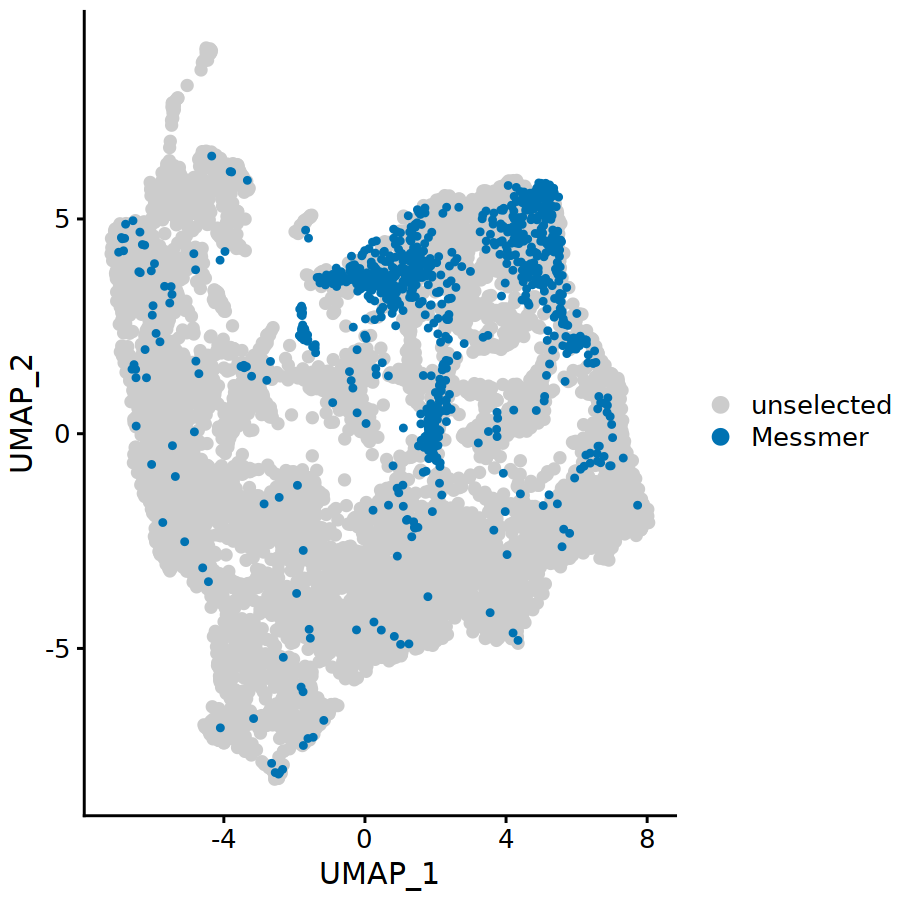

In [62]:
options(repr.plot.width=6, repr.plot.height=6)
umap_Messmer<- DimPlot(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration, reduction = "umap",cells.highlight= list(Messmer), cols.highlight = c("#0072B2") , pt.size =2, label.size = 3, cols= "grey")+ 
  scale_color_manual(labels = c("unselected","Messmer"), values = c("grey80","#0072B2")) 
umap_Messmer

In [63]:
pdf("Figures/FigS1B_UMAP_integrated_MPVZT_Messmer.pdf", width = 6, height = 6)
plot(umap_Pet)
dev.off()

png 
  2